# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

3 Observable Trends:
- Humidity is consistenly lowest for cities between 0 and 40 degrees latitude.
- The max temperature of any given place correlates relatively strongly to its latitude.
- The results of each hemispheres analysis do not differentiate much besides max temp vs. latitude comparison.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Import datetime with which we can label plots with current date
from datetime import datetime
date = datetime.today().strftime('%m/%d/%y')

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# get the openweathermap api url
url = "http://api.openweathermap.org/data/2.5/weather?"

# For temperature in Fahrenheit use units=imperial
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Get weather data for one sample city to know the output
sample_city = "Chicago"
temp_response = requests.get(query_url + sample_city)
temp_json = temp_response.json()

# Get the temperature from the response
print(json.dumps(temp_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 41.85,
        "lon": -87.65
    },
    "dt": 1612591680,
    "id": 4887398,
    "main": {
        "feels_like": -7.08,
        "humidity": 61,
        "pressure": 1012,
        "temp": 9.01,
        "temp_max": 10.4,
        "temp_min": 8.01
    },
    "name": "Chicago",
    "sys": {
        "country": "US",
        "id": 4861,
        "sunrise": 1612616244,
        "sunset": 1612653123,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 270,
        "gust": 25.32,
        "speed": 17.27
    }
}


In [5]:
# create list's for below fields to build the df as a part of next step
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# create an empty list to capture cities
city_list = []

counter = 0
i = 1

print('Beginning Data Retrieval')
print('-----------------------------')
# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    response_json = requests.get(query_url + city).json()
    
    try:
        
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        
        city_list.append(city)
        
        counter += 1
        
        if counter <= 50:
            print(f"Processing Record {counter} of set {i} | {city}")
        else:
            # reset the counter variable
            counter = 0
            i += 1
            print(f"Processing Record {counter} of set {i} | {city}")
    
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        print("City not found. Skipping...")
        pass

print('-----------------------------')
print('Data Retrieval Complete')    
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | cherskiy
Processing Record 2 of set 1 | rikitea
Processing Record 3 of set 1 | port blair
Processing Record 4 of set 1 | punta arenas
Processing Record 5 of set 1 | tautira
Processing Record 6 of set 1 | butaritari
Processing Record 7 of set 1 | severo-kurilsk
Processing Record 8 of set 1 | ushuaia
Processing Record 9 of set 1 | agadez
Processing Record 10 of set 1 | aklavik
Processing Record 11 of set 1 | kapaa
Processing Record 12 of set 1 | lasa
Processing Record 13 of set 1 | atar
Processing Record 14 of set 1 | busselton
Processing Record 15 of set 1 | juneau
Processing Record 16 of set 1 | faya
Processing Record 17 of set 1 | zonguldak
Processing Record 18 of set 1 | carnarvon
Processing Record 19 of set 1 | caravelas
Processing Record 20 of set 1 | yichang
Processing Record 21 of set 1 | cape town
Processing Record 22 of set 1 | east london
Processing Record 23 of set 1 | kenai
Processing Recor

Processing Record 36 of set 4 | hambantota
Processing Record 37 of set 4 | narsaq
Processing Record 38 of set 4 | hofn
Processing Record 39 of set 4 | lompoc
Processing Record 40 of set 4 | port hedland
Processing Record 41 of set 4 | thompson
Processing Record 42 of set 4 | micheweni
Processing Record 43 of set 4 | mykolayiv
Processing Record 44 of set 4 | merauke
Processing Record 45 of set 4 | taoudenni
Processing Record 46 of set 4 | jaffna
Processing Record 47 of set 4 | gerash
Processing Record 48 of set 4 | almaznyy
Processing Record 49 of set 4 | bethel
Processing Record 50 of set 4 | montanha
Processing Record 0 of set 5 | fairbanks
Processing Record 1 of set 5 | tezu
Processing Record 2 of set 5 | kruisfontein
Processing Record 3 of set 5 | orlik
Processing Record 4 of set 5 | nortelandia
Processing Record 5 of set 5 | rio gallegos
Processing Record 6 of set 5 | torbay
Processing Record 7 of set 5 | salekhard
Processing Record 8 of set 5 | bonthe
Processing Record 9 of set 5 

Processing Record 20 of set 8 | chara
Processing Record 21 of set 8 | pacific grove
Processing Record 22 of set 8 | nanortalik
Processing Record 23 of set 8 | sidi ali
Processing Record 24 of set 8 | bandarbeyla
Processing Record 25 of set 8 | manjacaze
Processing Record 26 of set 8 | bam
Processing Record 27 of set 8 | khorixas
Processing Record 28 of set 8 | bubaque
Processing Record 29 of set 8 | gazli
Processing Record 30 of set 8 | baie-comeau
Processing Record 31 of set 8 | tamandare
Processing Record 32 of set 8 | lagoa
Processing Record 33 of set 8 | americus
Processing Record 34 of set 8 | lakes entrance
Processing Record 35 of set 8 | kita
Processing Record 36 of set 8 | kadoma
Processing Record 37 of set 8 | ancud
Processing Record 38 of set 8 | puerto del rosario
Processing Record 39 of set 8 | tripoli
Processing Record 40 of set 8 | goba
Processing Record 41 of set 8 | yashalta
Processing Record 42 of set 8 | rovenki
City not found. Skipping...
City not found. Skipping...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create DataFrame
city_dict = {
    'City': city_list,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date  
}

city_df = pd.DataFrame(city_dict)

# Export Dataframe into a .csv
city_df.to_csv(output_data_file)

# display the df
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cherskiy,68.7500,161.3000,-6.97,79,79,3.71,RU,1612592218
1,rikitea,-23.1203,-134.9692,77.58,75,23,16.49,PF,1612592219
2,port blair,11.6667,92.7500,83.03,64,0,12.10,IN,1612592219
3,punta arenas,-53.1500,-70.9167,44.60,65,40,8.05,CL,1612592220
4,tautira,-17.7333,-149.1500,80.60,69,40,3.44,PF,1612591631


In [7]:
# get the statistical overview of the city_df
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.00000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,20.122626,16.66972,50.306872,72.406872,54.446655,7.963834,1.612592e+09
std,33.257191,89.37440,31.511957,20.079618,38.541449,5.581004,8.260952e+01
min,-54.800000,-179.16670,-43.600000,6.000000,0.000000,0.310000,1.612592e+09
25%,-7.913900,-59.79680,29.840000,62.000000,20.000000,3.440000,1.612592e+09
50%,22.566700,19.23450,60.800000,77.000000,63.000000,6.620000,1.612592e+09
75%,47.693100,93.45000,75.020000,88.000000,90.000000,10.710000,1.612592e+09
max,78.218600,179.31670,96.960000,100.000000,100.000000,31.160000,1.612592e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
(city_df["Humidity"] > 100).value_counts()

False    553
Name: Humidity, dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

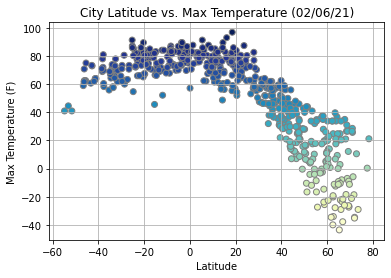

In [9]:
# Plot the Scatter plot for 'Lat' vs 'Max Temp'

# Import datetime with which we can label plots with current date
# called date libraby here again as I had faced issues when I only declared it under 1st cell
from datetime import datetime
date = datetime.today().strftime('%m/%d/%y')

x = city_df['Lat']
y = city_df['Max Temp']

# Set color to the value of 'Max Temp' and assign color based on the gradient scale of a colormap
plt.scatter(x, y, c=y, cmap='YlGnBu', edgecolor='grey')

#Assign labels, title, and grid
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# Save plot as png file in output folder
plt.savefig("output_data/Lat_Vs_Temp.png")

plt.show()

Notes on Latitude vs. Max Temp Plot
- The closer the latitude to zero, the hotter the temperature.

## Latitude vs. Humidity Plot

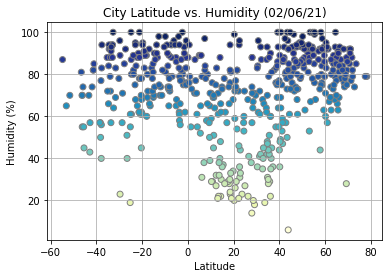

In [10]:
# Plot the Scatter plot for 'Lat' vs 'Humidity'
x = city_df['Lat']
y = city_df['Humidity']

# Set color to the value of 'Humidity' and assign color based on the gradient scale of a colormap
plt.scatter(x, y, c=y, cmap='YlGnBu', edgecolor='gray')

#Assign labels, title, and grid
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save plot as png file in output folder
plt.savefig('output_data/Lat_Vs_Humidity.png')

plt.show()

Notes on Latitude vs. Humidity Plot
- The overall humidity drops between 0 and 40 degrees latitude.

## Latitude vs. Cloudiness Plot

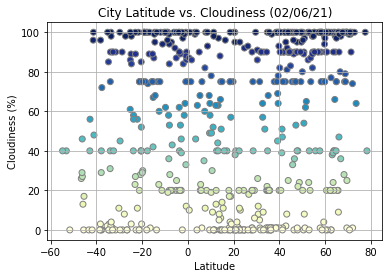

In [11]:
# Plot the Scatter plot for 'Lat' vs 'Cloudiness'
x = city_df['Lat']
y = city_df['Cloudiness']

# Set color to the value of 'Humidity' and assign color based on the gradient scale of a colormap
plt.scatter(x, y, c=y, cmap='YlGnBu', edgecolor='gray')

#Assign labels, title, and grid
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save plot as png file in output folder
plt.savefig('output_data/Lat_Vs_Cloudiness.png')

plt.show()

Notes on Latitude vs. Cloudiness Plot
- It shows the consistency of cloudiness percentage at certain values, notably 0%, 20%, 40%, 75%, and 100%.

## Latitude vs. Wind Speed Plot

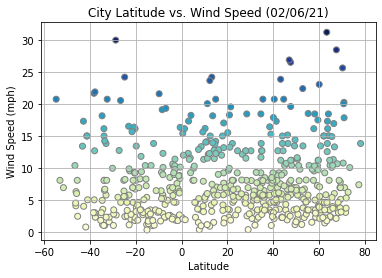

In [12]:
# Plot the Scatter plot for 'Lat' vs 'Wind Speed'
x = city_df['Lat']
y = city_df['Wind Speed']

# Set color to the value of 'Humidity' and assign color based on the gradient scale of a colormap
plt.scatter(x, y, c=y, cmap='YlGnBu', edgecolor='gray')

#Assign labels, title, and grid
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# Save plot as png file in output folder
plt.savefig('output_data/Lat_Vs_Wind Speed.png')

plt.show()

Notes on Latitude vs. Wind Speed Plot
- The conclusion I can bring from this is - its very rare for wind speeds to rise above 20 mph.

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df.loc[city_df['Lat'] >= 0]
south_df = city_df.loc[city_df['Lat'] < 0]
south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,rikitea,-23.1203,-134.9692,77.58,75,23,16.49,PF,1612592219
3,punta arenas,-53.1500,-70.9167,44.60,65,40,8.05,CL,1612592220
4,tautira,-17.7333,-149.1500,80.60,69,40,3.44,PF,1612591631
7,ushuaia,-54.8000,-68.3000,41.00,87,40,20.71,AR,1612592194
13,busselton,-33.6500,115.3333,69.01,57,100,1.01,AU,1612592225


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8657425919521217


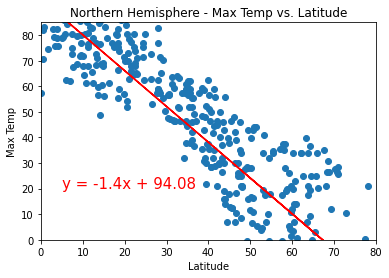

In [14]:
x_values_north = north_df["Lat"]
y_values_north = north_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_north,y_values_north)
plt.plot(x_values_north,regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=15,color="red")
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.xlim(0, 80)
plt.ylim(0, 85)

print(f"The r-value is: {rvalue}")

# Save plot as png file in output folder
plt.savefig('output_data/North_Temp_Vs_Lat.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5646915547239063


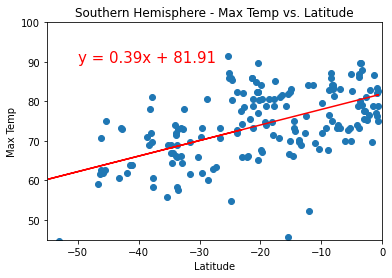

In [15]:
x_values_south = south_df["Lat"]
y_values_south = south_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_south,y_values_south)
plt.plot(x_values_south,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.xlim(-55, 0)
plt.ylim(45, 100)

print(f"The r-value is: {rvalue}")

# Save plot as png file in output folder
plt.savefig('output_data/South_Temp_Vs_Lat.png')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.4314084665789432


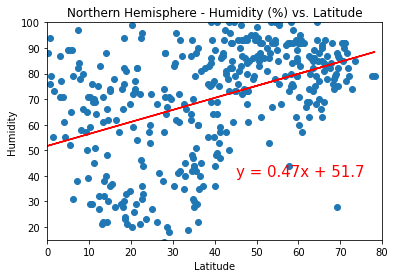

In [16]:
x_values_north = north_df["Lat"]
y_values_north = north_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_north,y_values_north)
plt.plot(x_values_north,regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xlim(0, 80)
plt.ylim(15, 100)


print(f"The r-value is: {rvalue}")

# Save plot as png file in output folder
plt.savefig('output_data/North_Humidity_Vs_Lat.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21883721352664903


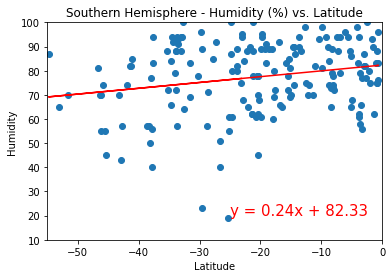

In [17]:
x_values_south = south_df["Lat"]
y_values_south = south_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_south,y_values_south)
plt.plot(x_values_south,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xlim(-55, 0)
plt.ylim(10, 100)

print(f"The r-value is: {rvalue}")

# Save plot as png file in output folder
plt.savefig('output_data/South_Humidity_Vs_Lat.png')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2963594703767239


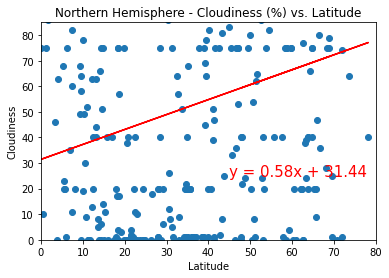

In [18]:
x_values_north = north_df["Lat"]
y_values_north = north_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_north,y_values_north)
plt.plot(x_values_north,regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.xlim(0, 80)
plt.ylim(0, 85)

print(f"The r-value is: {rvalue}")

# Save plot as png file in output folder
plt.savefig('output_data/North_Cloudiness_Vs_Lat.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.32379561990604017


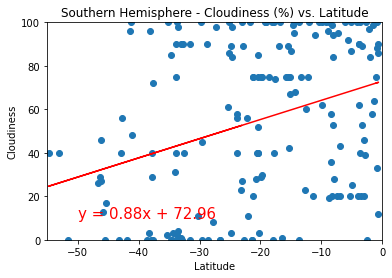

In [19]:
x_values_south = south_df["Lat"]
y_values_south = south_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_south,y_values_south)
plt.plot(x_values_south,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.xlim(-55, 0)
plt.ylim(0, 100)

print(f"The r-value is: {rvalue}")

# Save plot as png file in output folder
plt.savefig('output_data/South_Cloudiness_Vs_Lat.png')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.0012976411193935586


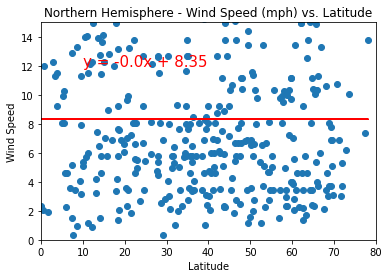

In [20]:
x_values_north = north_df["Lat"]
y_values_north = north_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_north,y_values_north)
plt.plot(x_values_north,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.xlim(0, 80)
plt.ylim(0, 15)

print(f"The r-value is: {rvalue}")

# Save plot as png file in output folder
plt.savefig('output_data/North_Wind_Speed_Vs_Lat.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.12629168405883942


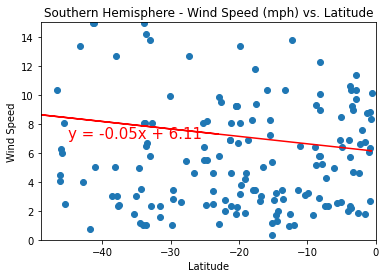

In [21]:
x_values_south = south_df["Lat"]
y_values_south = south_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_south,y_values_south)
plt.plot(x_values_south,regress_values,"r-")
plt.annotate(line_eq,(-45,7),fontsize=15,color="red")
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.xlim(-49, 0)
plt.ylim(0, 15)

print(f"The r-value is: {rvalue}")

# Save plot as png file in output folder
plt.savefig('output_data/South_Wind_Speed_Vs_Lat.png')

plt.show()